# Actual Description

## Notebook for some test of the *stareg* package
1. Simulated data 1d
2. Simulated data 2d
3. Ebner data
4. Bosch data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from stareg import Bspline
from stareg import star_model, star_model_predict, Stareg

MEEEE and Moooooo and asdasdasd


# Legacy description

## Notebook for all the little code snippets for the code cleaning of *stareg*

TODOs:
- [x] B-spline
- [x] TP-Bspline
- [x] Penalty and smoothness matrices
- [x] check_constraint
- [x] star_model

I'll try to use as little external libraries as possible.

# 1. Test 1D Fit using B-spline, P-spline and SC-P-spline from *stareg*

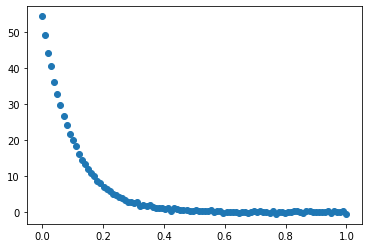

In [3]:
np.random.seed(2)
x = np.linspace(0,1,100)
xplot = np.linspace(0,1,100)
def f(x): return np.exp(-(x - 0.4)/ 0.1)
ytrue = f(x)
yplot = f(xplot)
y = ytrue + np.random.normal(scale=0.2, size=len(x))
plt.scatter(x,y)
BS = Bspline()

nr_splines = 100
l = 3
knot_type = "e"

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 88.51it/s]


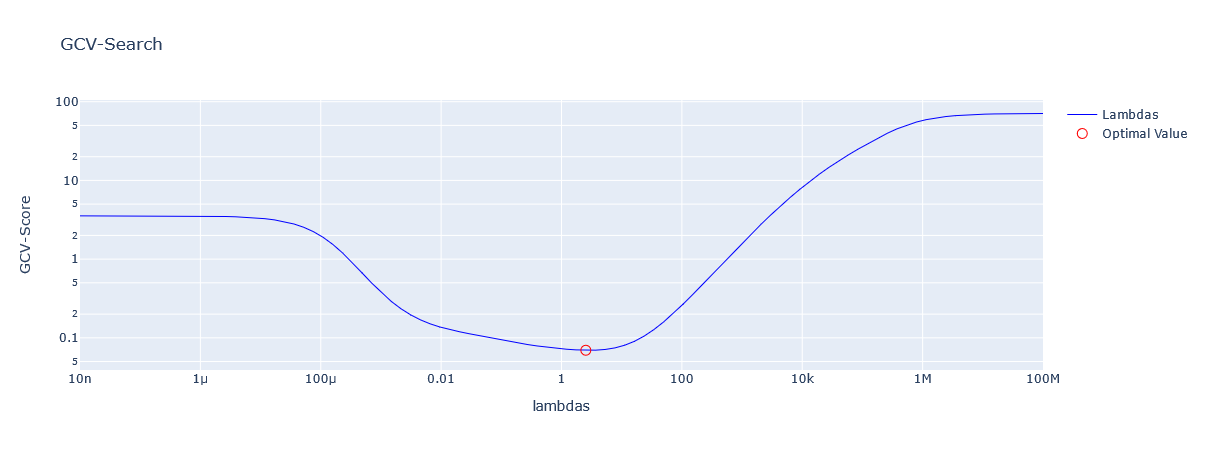

  7%|████████████▋                                                                                                                                                                         | 7/100 [00:00<00:01, 69.98it/s]

Best Lambda found =  2.5353644939701168


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 85.37it/s]


========Pre-Iteration=========
-------MSE = 0.0369057--------
======== Iteration 1 =========
-------MSE = 0.0384917--------
======== Iteration 2 =========
-------MSE = 0.0389159--------
======== Iteration 3 =========
-------MSE = 0.0390006--------
======== Iteration 4 =========
--------MSE = 0.039014--------


In [4]:
Bs = BS.fit(X=x, y=y, nr_splines=nr_splines, l=l, knot_type=knot_type)
best_lam = BS.calc_GCV(X=x, y=y, nr_splines=nr_splines, l=l, knot_type=knot_type, nr_lam=100)["best_lambda"]
print("Best Lambda found = ", best_lam)
Ps = BS.fit_Pspline(X=x, y=y, nr_splines=nr_splines, l=l, knot_type=knot_type, lam=best_lam)
SCs = BS.fit_SC_Pspline(X=x, y=y, constraint="dec", nr_splines=nr_splines, l=l, knot_type=knot_type, lam_c=3000)

In [5]:
Bspred_plot = BS.predict(Xpred=xplot, coef=Bs["coef_"], knots=Bs["knots"], l=l)
Pspred_plot = BS.predict(Xpred=xplot, coef=Ps["coef_"], knots=Ps["knots"], l=l)
SCspred_plot = BS.predict(Xpred=xplot, coef=SCs["coef_"], knots=SCs["knots"], l=l)

---Prediction for 1-D Data----
---Prediction for 1-D Data----
---Prediction for 1-D Data----


In [6]:
print("MSE on True and Fine Grid data".center(40,"="))
print("Tensor-product B-spline: ", mean_squared_error(Bspred_plot, yplot).round(6))
print("Tensor-product P-spline: ", mean_squared_error(Pspred_plot, yplot).round(6))
print("SC Tensor-product P-spline: ", mean_squared_error(SCspred_plot, yplot).round(6))

=====MSE on True and Fine Grid data=====
Tensor-product B-spline:  0.043448
Tensor-product P-spline:  0.008396
SC Tensor-product P-spline:  0.006688


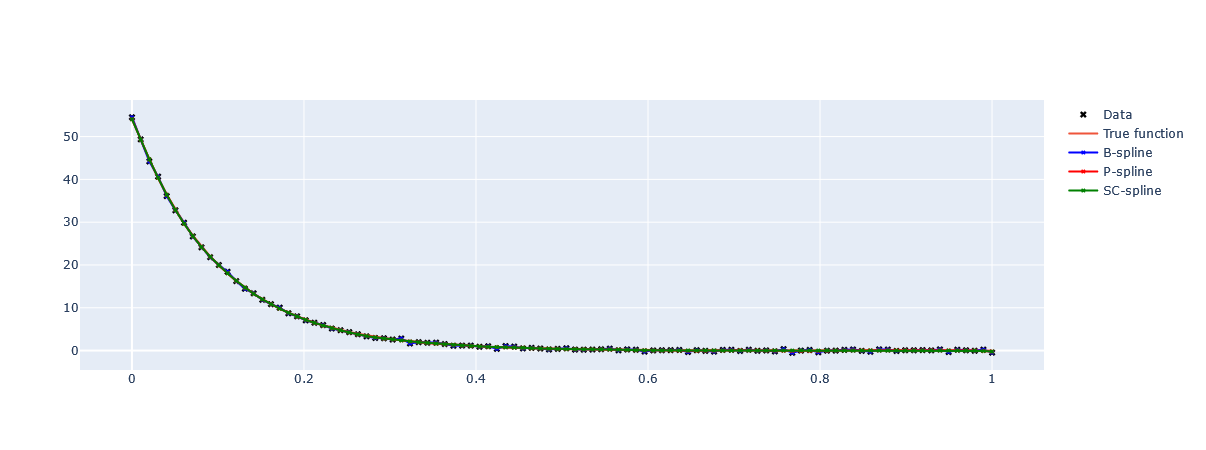

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", marker=dict(size=6, color="black", symbol="x"), name="Data"))
fig.add_trace(go.Scatter(x=xplot, y=yplot, name="True function"))
fig.add_trace(go.Scatter(x=xplot, y=Bspred_plot, mode="markers+lines", marker=dict(size=4, color="blue", symbol="x"), name="B-spline"))
fig.add_trace(go.Scatter(x=xplot, y=Pspred_plot, mode="markers+lines", marker=dict(size=4, color="red", symbol="x"), name="P-spline"))
fig.add_trace(go.Scatter(x=xplot, y=SCspred_plot, mode="markers+lines", marker=dict(size=4, color="green", symbol="x"), name="SC-spline"))

#fig = BS.plot_basis(knots=Ps["knots"], coef=Ps["coef_"], x=xplot, fig=fig, l=l)
fig.show()

# 2. Test 2-D Fit using TP-spline, TP-P-spline and TP-SC-P-spline from *stareg*

In [8]:
np.random.seed(2)
#x1 = np.random.rand(1000)
#x2 = np.random.rand(1000)
x1 = np.linspace(0,1,5)
x1g, x2g = np.meshgrid(x1,x1)
data = np.vstack((x1g.ravel(),x2g.ravel())).T

def f(x1,x2): return np.exp(-(x2-0.5)**2) + x1**2

ztrue = f(data[:,0], data[:,1])
z = ztrue + np.random.normal(scale=0.1, size=len(ztrue))
df = pd.DataFrame(data=dict(x1=data[:,0], x2=data[:,1], z=z))
df_train, df_test = train_test_split(df)

In [9]:
xplot = np.linspace(0,1,25)
xplot1,xplot2 = np.meshgrid(xplot, xplot)
Xplot = np.vstack((xplot1.ravel(), xplot2.ravel())).T
zplot = f(xplot1.ravel(), xplot2.ravel())

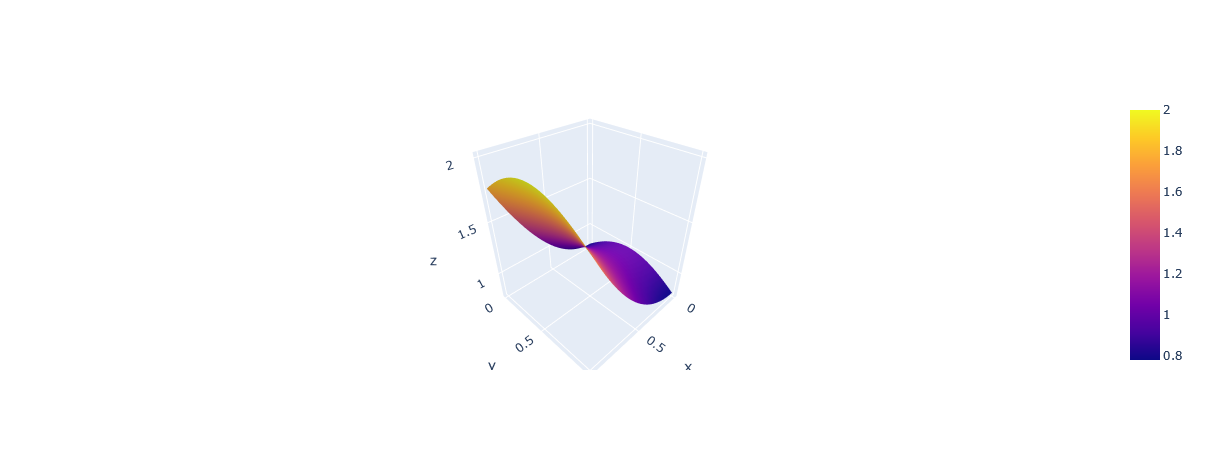

In [10]:
fig = go.Figure()
fig.add_trace(go.Surface(x=xplot1, y=xplot2, z=zplot.reshape(xplot1.shape)))

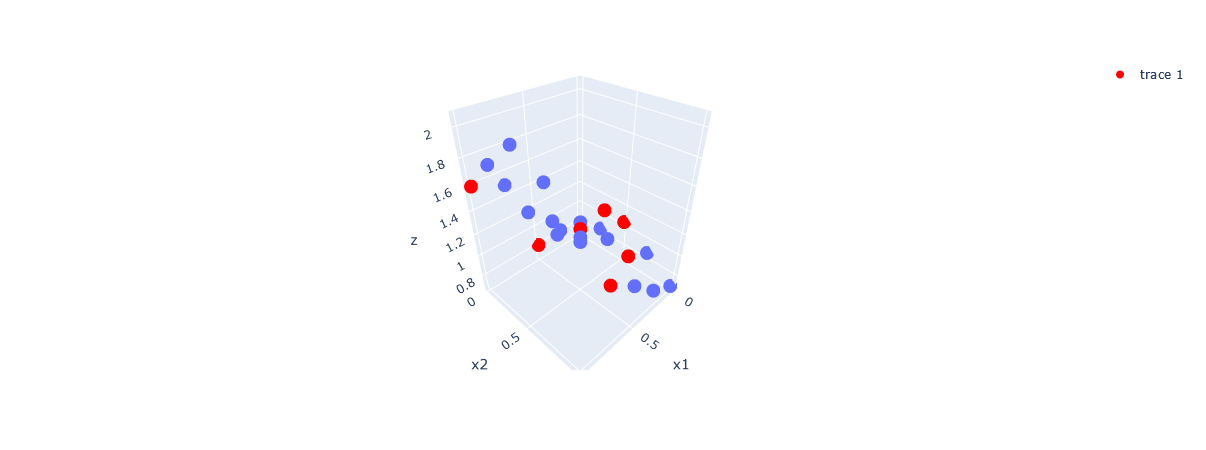

In [11]:
fig = px.scatter_3d(df_train, x="x1", y="x2", z="z")
fig.add_trace(go.Scatter3d(x=df_test["x1"], y=df_test["x2"], z=df_test["z"], mode="markers", marker=dict(color="red")))
fig.show()

In [12]:
nr_splines = (12,10)
l, knot_type = (3,3), ("e", "e")
BS = Bspline()
nr_lam = 100

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 48.22it/s]


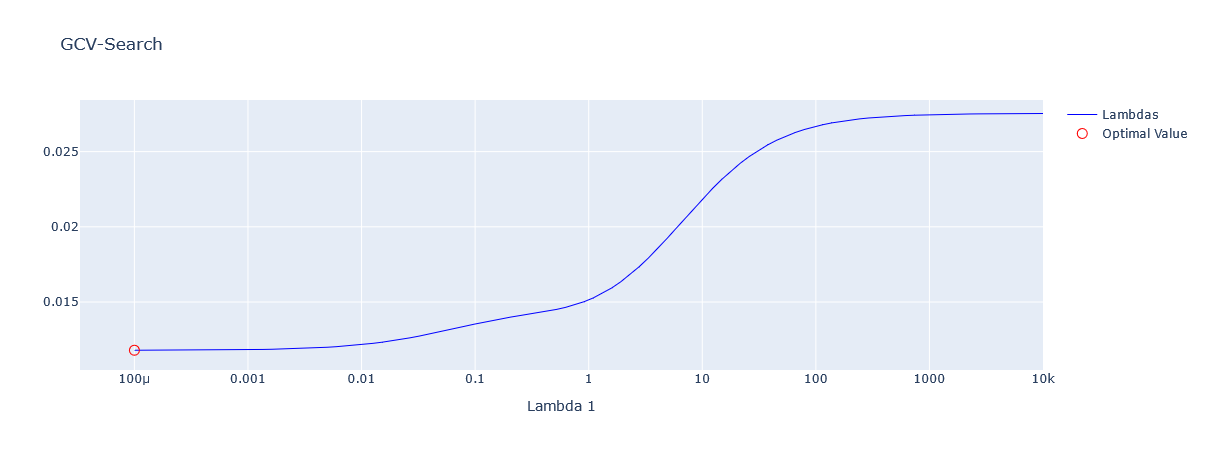

---unconstrained MSE = 0.0----
======== Iteration 1 =========
----------MSE = 0.0-----------
======== Iteration 2 =========
----------MSE = 0.0-----------
======== Iteration 3 =========
----------MSE = 0.0-----------


In [13]:
Bs = BS.fit(X=df_train[["x1", "x2"]].values, y=df_train["z"].values, 
            nr_splines=nr_splines, l=l, knot_type=knot_type)
best_lam=BS.calc_GCV_2d(df_train[["x1","x2"]].values, df_train["z"].values, nr_splines, nr_lam=20, plot_=0)
Ps = BS.fit_Pspline(X=df_train[["x1", "x2"]].values, y=df_train["z"].values, 
                    nr_splines=nr_splines, l=l, knot_type=knot_type, lam=best_lam["best_lambda"])
SCs = BS.fit_SC_TP_Pspline(X=df_train[["x1", "x2"]].values, y=df_train["z"].values,
                           constraints=("inc", "none"), nr_splines=nr_splines, l=l, knot_type=knot_type, lam_c=(6000,0))

In [19]:
Bspred = BS.predict(Xpred=df_test[["x1", "x2"]].values, coef=Bs["coef_"], knots=Bs["knots"], l=l)
Pspred = BS.predict(Xpred=df_test[["x1", "x2"]].values, coef=Ps["coef_"], knots=Ps["knots"], l=l)
SCspred = BS.predict(Xpred=df_test[["x1", "x2"]].values, coef=SCs["coef_"], knots=SCs["knots"], l=l)

Bspred_plot = BS.predict(Xpred=Xplot, coef=Bs["coef_"], knots=Bs["knots"], l=l)
Pspred_plot = BS.predict(Xpred=Xplot, coef=Ps["coef_"], knots=Ps["knots"], l=l)
SCspred_plot = BS.predict(Xpred=Xplot, coef=SCs["coef_"], knots=SCs["knots"], l=l)


---Prediction for 2-D Data----
---Prediction for 2-D Data----
---Prediction for 2-D Data----
---Prediction for 2-D Data----
---Prediction for 2-D Data----
---Prediction for 2-D Data----


In [22]:
lj = 30
print("MSE on Validation data".center(40,"="))
print("Tensor-product B-spline: ".ljust(lj), mean_squared_error(Bspred, df_test["z"]).round(6))
print("Tensor-product P-spline: ".ljust(lj), mean_squared_error(Pspred, df_test["z"]).round(6))
print("Tensor-product SC-P-spline: ".ljust(lj), mean_squared_error(SCspred, df_test["z"]).round(6))
print("MSE on True and Fine Grid data".center(40,"="))
print("Tensor-product B-spline: ".ljust(lj), mean_squared_error(Bspred_plot, zplot).round(6))
print("Tensor-product P-spline: ".ljust(lj), mean_squared_error(Pspred_plot, zplot).round(6))
print("Tensor-product SC-P-spline: ".ljust(lj), mean_squared_error(SCspred_plot, zplot).round(6))

=========MSE on Validation data=========
Tensor-product B-spline:       1.063593
Tensor-product P-spline:       0.019251
Tensor-product SC-P-spline:    0.017299
=====MSE on True and Fine Grid data=====
Tensor-product B-spline:       0.272158
Tensor-product P-spline:       0.00498
Tensor-product SC-P-spline:    0.005228


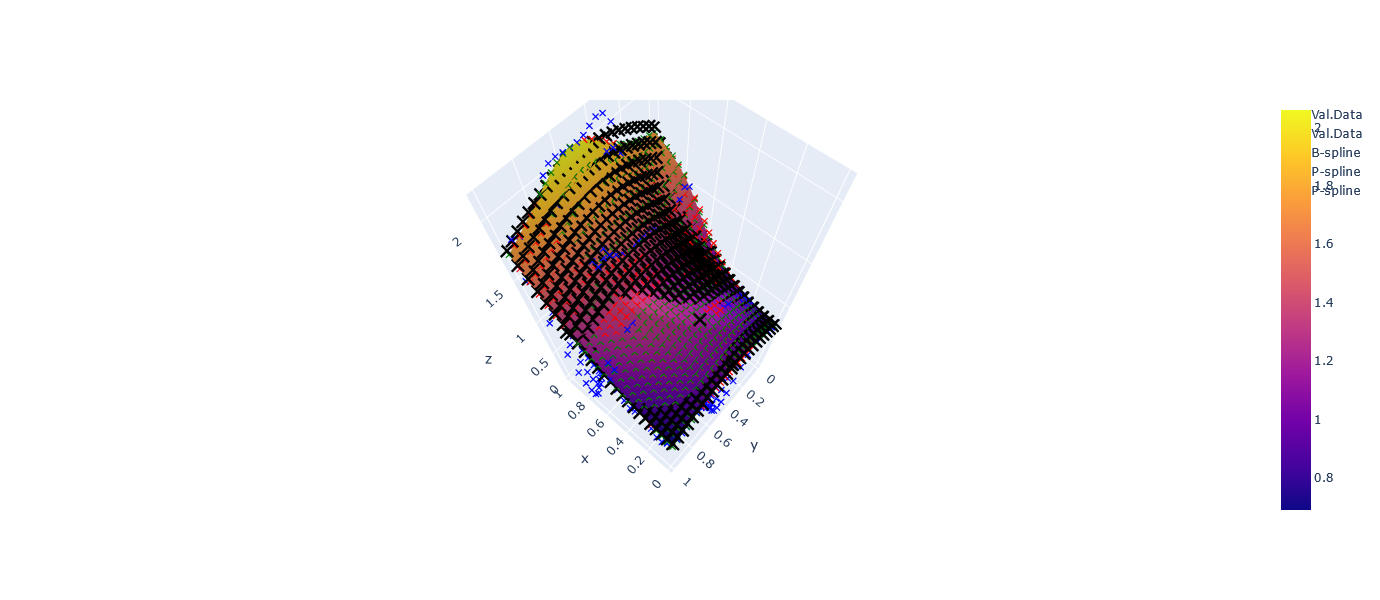

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=df_test["x1"], y=df_test["x2"], z=df_test["z"], 
    mode="markers", marker=dict(color="black", symbol="x", size=4), name="Val.Data"))
fig.add_trace(go.Scatter3d(
    x=Xplot[:,0], y=Xplot[:,1], z=zplot, 
    mode="markers", marker=dict(color="black", symbol="x", size=4), name="Val.Data"))
fig.add_trace(go.Scatter3d(
    x=Xplot[:,0], y=Xplot[:,1], z=Bspred_plot, 
    mode="markers", marker=dict(color="blue", symbol="x", size=2), name="B-spline"))
fig.add_trace(go.Scatter3d(
    x=Xplot[:,0], y=Xplot[:,1], z=Pspred_plot, 
    mode="markers", marker=dict(color="red", symbol="x", size=2), name="P-spline"))
fig.add_trace(go.Scatter3d(
    x=Xplot[:,0], y=Xplot[:,1], z=SCspred_plot, 
    mode="markers", marker=dict(color="green", symbol="x", size=2), name="P-spline"))

#fig.add_trace(go.Surface(x=xplot1, y=xplot2, z=Pspred_plot.reshape(xplot1.shape)))
fig.add_trace(go.Surface(x=xplot1, y=xplot2, z=SCspred_plot.reshape(xplot1.shape)))

fig.update_layout(height=600)

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pathlib import Path

In [2]:
from stareg import star_model, star_model_predict

MEEEE and Moooooo and asdasdasd


## **STAR MODEL**

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pathlib import Path

from stareg import Bspline
from stareg import star_model, star_model_predict, Stareg

In [24]:
np.random.seed(2)
m = ( ("s(1)", 100, "inc", 6000, "e"), 
      #("s(2)", 100, "peak", 6000, "e"), 
      ("t(1,2)", (12,10), ("none", "none"), (6000,6000), ("e", "e")), )
      #("t(1,2)", (12,10), ("none", "none"), (6000,6000), ("e", "e")),)

XX = np.array([np.random.uniform(0,1,500), np.random.uniform(0,1, 500)]).T
#XX = np.array([np.linspace(0,1,25), np.linspace(1,11,25)]).T

y = XX[:,0]**2 * XX[:,1] + 2*np.exp(-(XX[:,1] - 0.6)**2) + np.random.normal(scale=0.02, size=XX[:,0].shape)

In [25]:
df = pd.DataFrame(data=dict(x1=XX[:,0], x2=XX[:,1], z=y))
df_train, df_test = train_test_split(df)

In [26]:
dim1, dim2 = int("t(1,2)"[2]), int("t(1,2)"[4])

In [27]:
descr = m
X = df_train[["x1", "x2"]].values
y = df_train["z"].values

In [29]:
model = Stareg()

Class initialization


In [31]:
fit = model.fit(m, X=X, y=y)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 42.53it/s]


===================Iteration 1====================
            MSE: 0.0002830335280309995            
===================Iteration 2====================
           MSE: 0.00028301573226850247            
===================Iteration 3====================
            MSE: 0.0002830604599426667            
===================Iteration 4====================
           MSE: 0.00028312706847408604            
===================Iteration 5====================
            MSE: 0.0002831687469109499            
===================Iteration 6====================
            MSE: 0.0002832371097673566            
===================Iteration 7====================
           MSE: 0.00028332494505651677            
===================Iteration 8====================
            MSE: 0.0002833461091041613            
---------------Iteration Finished!----------------


In [37]:
X.shape

(375, 2)

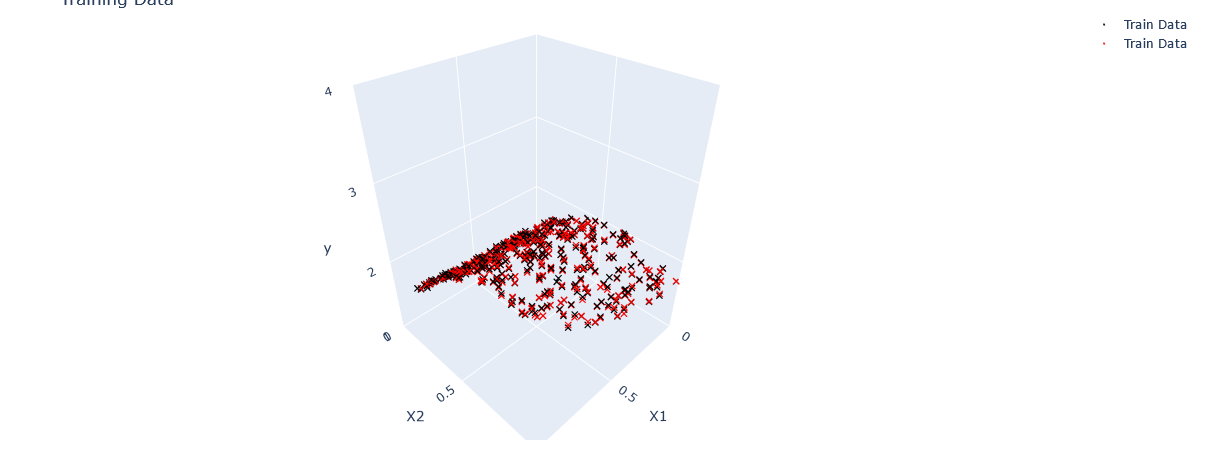

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode="markers", marker=dict(size=2, color="black", symbol="x"), name="Train Data"))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=fit["B"]@fit["coef_"], 
                           mode="markers", marker=dict(size=2, color="red", symbol="x"), name="Train Data"))

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,1],title="X1"),
        yaxis = dict(nticks=4, range=[0,1],title="X2"),
        zaxis = dict(nticks=4, range=[1,4],title="y"),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10),
    title="Training Data")



# **Ebner Data**

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pathlib import Path

from stareg import Bspline
from stareg import star_model, star_model_predict, Stareg

## Load Data, perform Train-Validation Split and Normalized Input

In [20]:
np.random.seed(2)
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cha5/Ebner/')
path = Path("..\\..\\Data\\")
df = pd.read_csv(filepath_or_buffer=path/"Table_alpha_Data.txt")
df.columns = ["mDot", "T", "HTC"]
maxVals, minVals = df.max(), df.min()
# train-test split
dftrain, dftest = train_test_split(df, test_size=0.5)
Xtrain, ytrain = dftrain[["mDot", "T"]].values, dftrain["HTC"].values
Xtest, ytest = dftest[["mDot", "T"]].values, dftest["HTC"].values
# normalized input data
Xtrain_norm = (Xtrain - minVals[["mDot", "T"]].values.reshape((-1,2))) / (maxVals - minVals)[["mDot", "T"]].values.reshape(-1,2)
Xtest_norm = (Xtest - minVals[["mDot", "T"]].values.reshape((-1,2))) / (maxVals - minVals)[["mDot", "T"]].values.reshape(-1,2)

### Create the model descriptions

In [21]:
model_list =["s1s2_WC", "s1s2", "t12_WC", "t12", "tot_WC", "tot"]
m_s1s2_without_constrait =  (("s(1)", 100, "none", 0, "e"), 
                             ("s(2)", 100, "none", 0, "e"), )
m_s1s2 = (("s(1)", 100, "inc", 1000, "e"), 
          ("s(2)", 100, "peak", 1000, "e"), )
m_t12_without_constraint = (("t(1,2)", (20,10), ("none", "none"), (0,0), ("e", "e")), )
m_t12 = (("t(1,2)", (20,10), ("inc", "none"), (6000,6000), ("e", "e")), )

m_tot_without_constraint = ( ("s(1)", 100, "none", 0, "e"), 
                             ("s(2)", 100, "none", 0, "e"),
                             ("t(1,2)", (20,10), ("none", "none"), (0,0), ("e", "e")), )
m_tot = ( ("s(1)", 100, "inc", 1000, "e"), 
          ("s(2)", 100, "peak", 1000, "e"),
          ("t(1,2)", (20,10), ("inc", "none"), (6000,6000), ("e", "e")), )

In [22]:
STAREG = Stareg()

M1 = STAREG.fit(m_s1s2_without_constrait, Xtrain, ytrain)
M2 = STAREG.fit(m_s1s2, Xtrain, ytrain)
M3 = STAREG.fit(m_t12_without_constraint, Xtrain, ytrain)
M4 = STAREG.fit(m_t12, Xtrain, ytrain)
M5 = STAREG.fit(m_tot_without_constraint, Xtrain, ytrain)
M6 = STAREG.fit(m_tot, Xtrain, ytrain)

  8%|██████████████▌                                                                                                                                                                       | 8/100 [00:00<00:01, 77.13it/s]

Class initialization


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 83.14it/s]


===================Iteration 1====================
             MSE: 247295.93908098884              


  9%|████████████████▍                                                                                                                                                                     | 9/100 [00:00<00:01, 88.46it/s]

---------------Iteration Finished!----------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 79.45it/s]


===================Iteration 1====================
              MSE: 288780.279184686               
===================Iteration 2====================
              MSE: 291186.7333793593              
===================Iteration 3====================
              MSE: 320133.5662804814              
===================Iteration 4====================
              MSE: 329775.4791147725              
===================Iteration 5====================
             MSE: 330142.52859540225              
===================Iteration 6====================
              MSE: 330144.6288502041              


  2%|███▋                                                                                                                                                                                  | 2/100 [00:00<00:05, 18.74it/s]

---------------Iteration Finished!----------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.08it/s]


===================Iteration 1====================
             MSE: 182195.98456668836              


  0%|                                                                                                                                                                                              | 0/100 [00:00<?, ?it/s]

---------------Iteration Finished!----------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.40it/s]


===================Iteration 1====================
             MSE: 209371.35499465972              
===================Iteration 2====================
              MSE: 223574.3005443367              
===================Iteration 3====================
             MSE: 235723.88941265474              
===================Iteration 4====================
             MSE: 237229.06226538058              
===================Iteration 5====================
             MSE: 238322.85185322518              
===================Iteration 6====================
             MSE: 238959.73732147936              
===================Iteration 7====================
             MSE: 239071.36835799325              
===================Iteration 8====================
              MSE: 239151.9635872097              
===================Iteration 9====================
              MSE: 239158.6486303457              
===================Iteration 10===================
             MSE: 239123.764582

  9%|████████████████▍                                                                                                                                                                     | 9/100 [00:00<00:01, 88.47it/s]

---------------Iteration Finished!----------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.61it/s]


===================Iteration 1====================
             MSE: 142051.30444403182              


  9%|████████████████▍                                                                                                                                                                     | 9/100 [00:00<00:01, 89.35it/s]

---------------Iteration Finished!----------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.27it/s]


===================Iteration 1====================
             MSE: 171722.21474734248              
===================Iteration 2====================
             MSE: 188222.99939216624              
===================Iteration 3====================
             MSE: 205851.28495101977              
===================Iteration 4====================
             MSE: 214207.21729350428              
===================Iteration 5====================
             MSE: 214898.56259995574              
===================Iteration 6====================
             MSE: 215075.28593986752              
===================Iteration 7====================
              MSE: 215593.9847233031              
===================Iteration 8====================
             MSE: 215770.03123324868              
===================Iteration 9====================
              MSE: 215712.2664934492              
===================Iteration 10===================
             MSE: 215759.463877

## Calculate the predictions on test data

In [10]:
M1pred = STAREG.predict(Xpred=Xtest, model=M1["model"], coef_=M1["coef_"])
M2pred = STAREG.predict(Xpred=Xtest, model=M2["model"], coef_=M2["coef_"])
M3pred = STAREG.predict(Xpred=Xtest, model=M3["model"], coef_=M3["coef_"])
M4pred = STAREG.predict(Xpred=Xtest, model=M4["model"], coef_=M4["coef_"])
M5pred = STAREG.predict(Xpred=Xtest, model=M5["model"], coef_=M5["coef_"])
M6pred = STAREG.predict(Xpred=Xtest, model=M6["model"], coef_=M6["coef_"])

Process  s(1)
Process  s(2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  t(1,2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  s(1)
Process  s(2)
Process  t(1,2)


## Print MSE and EDoF on Validation Data

In [11]:
MSE_M1, edof_M1 = mean_squared_error(ytest, M1pred["ypred"]), STAREG.calc_edof(B=M1["B"], S=M1["S"], K=M1["K"]).round(3)
MSE_M2, edof_M2 = mean_squared_error(ytest, M2pred["ypred"]), STAREG.calc_edof(B=M2["B"], S=M2["S"], K=M2["K"]).round(3)

MSE_M3, edof_M3 = mean_squared_error(ytest, M3pred["ypred"]), STAREG.calc_edof(B=M3["B"], S=M3["S"], K=M3["K"]).round(3)
MSE_M4, edof_M4 = mean_squared_error(ytest, M4pred["ypred"]), STAREG.calc_edof(B=M4["B"], S=M4["S"], K=M4["K"]).round(3)
MSE_M5, edof_M5 = mean_squared_error(ytest, M5pred["ypred"]), STAREG.calc_edof(B=M5["B"], S=M5["S"], K=M5["K"]).round(3)
MSE_M6, edof_M6 = mean_squared_error(ytest, M6pred["ypred"]), STAREG.calc_edof(B=M6["B"], S=M6["S"], K=M6["K"]).round(3)

r, lj = 8, 14
print("".center(50,"="))
print("MSEs on Validation Data".center(50, " "))
print("".center(50,"="))
print(f"{model_list[0]}-MSE = ".ljust(lj), MSE_M1, " EDoF: ".rjust(r, "|"), edof_M1)
print(f"{model_list[1]}-MSE = ".ljust(lj), MSE_M2, " EDoF: ".rjust(r, "|"), edof_M2)
print(f"{model_list[2]}-MSE = ".ljust(lj), MSE_M3, " EDoF: ".rjust(r, "|"), edof_M3)
print(f"{model_list[3]}-MSE = ".ljust(lj), MSE_M4, " EDoF: ".rjust(r, "|"), edof_M4)
print(f"{model_list[4]}-MSE = ".ljust(lj), MSE_M5, " EDoF: ".rjust(r, "|"), edof_M5)
print(f"{model_list[5]}-MSE = ".ljust(lj), MSE_M6, " EDoF: ".rjust(r, "|"), edof_M6)

df_mses = pd.DataFrame(
    data=dict(Model=["M1","M2","M3","M4","M5","M6"], MSE_val=[MSE_M1, MSE_M2, MSE_M3, MSE_M4, MSE_M5, MSE_M6], 
              EDoF=[edof_M1, edof_M2, edof_M3, edof_M4, edof_M5, edof_M6]))

             MSEs on Validation Data              
s1s2_WC-MSE =  321694.22709610505 | EDoF:  108.021
s1s2-MSE =     327161.6987718339 | EDoF:  30.499
t12_WC-MSE =   214093.83255598985 | EDoF:  120.038
t12-MSE =      204704.9362003915 | EDoF:  41.716
tot_WC-MSE =   225069.16257219057 | EDoF:  192.326
tot-MSE =      213300.1109406767 | EDoF:  82.681


### Plotting 

In [14]:
xplot = np.linspace(0,1,25)
xp1, xp2 = np.meshgrid(xplot, xplot)
Xplot = np.array([xp1.ravel(), xp2.ravel()]).T

Process  t(1,2)


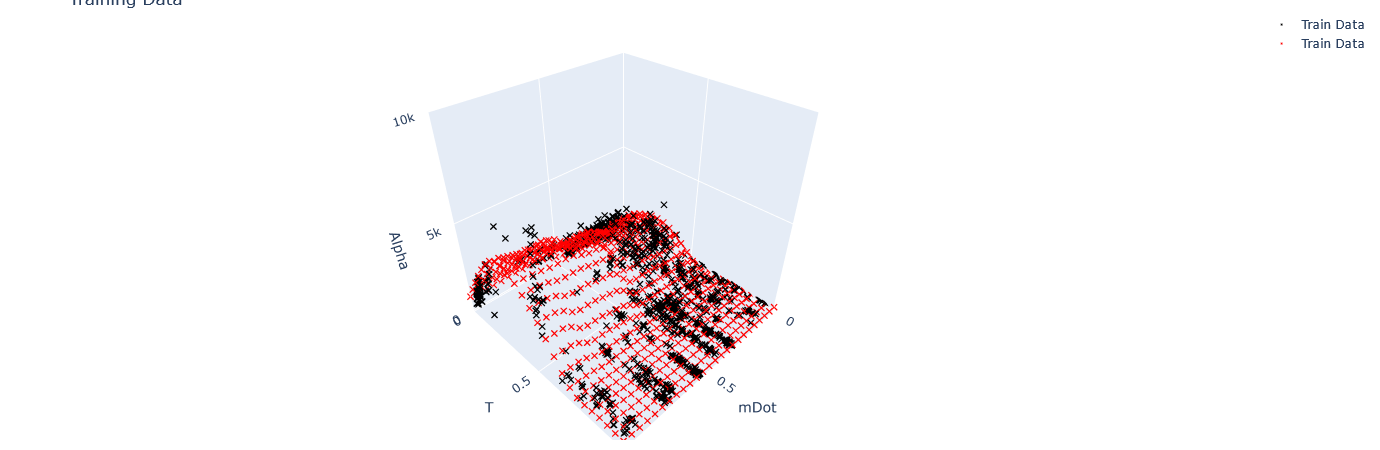

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Xtest_norm[:,0], y=Xtest_norm[:,1], z=ytest, mode="markers", marker=dict(size=2, color="black", symbol="x"), name="Train Data"))
fig.add_trace(go.Scatter3d(x=Xplot[:,0], y=Xplot[:,1], z=STAREG.predict(Xpred=Xplot, model=M4["model"], coef_=M4["coef_"])["ypred"], 
                           mode="markers", marker=dict(size=2, color="red", symbol="x"), name="Train Data"))

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,1],title="mDot"),
        yaxis = dict(nticks=4, range=[0,1],title="T"),
        zaxis = dict(nticks=4, range=[-100,10000],title="Alpha"),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10),
    title="Training Data")

### Data Saving

In [41]:
xsave = np.linspace(0,1,25)
xs1, xs2 = np.meshgrid(xplot, xplot)
Xsave = np.array([xp1.ravel(), xp2.ravel()]).T
M1save = star_model_predict(Xpred=Xsave, coefs=M1["coef_"], descr=m_s1s2_without_constrait)
M2save = star_model_predict(Xpred=Xsave, coefs=M2["coef_"], descr=m_s1s2)
M3save = star_model_predict(Xpred=Xsave, coefs=M3["coef_"], descr=m_t12_without_constraint)
M4save = star_model_predict(Xpred=Xsave, coefs=M4["coef_"], descr=m_t12)
M5save = star_model_predict(Xpred=Xsave, coefs=M5["coef_"], descr=m_tot_without_constraint)
M6save = star_model_predict(Xpred=Xsave, coefs=M6["coef_"], descr=m_tot)

Process  s(1)
Process  s(2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  t(1,2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  s(1)
Process  s(2)
Process  t(1,2)


In [42]:
Xsave_rescaled = Xsave * (maxVals[["mDot", "T"]] - minVals[["mDot", "T"]]).values.reshape(-1,2) + minVals[["mDot", "T"]].values.reshape(-1,2)

In [47]:
df_save_fits = pd.DataFrame(
    data=dict(x1=Xsave_rescaled[:,0], x2=Xsave_rescaled[:,1], M1=M1save["y"], 
              M2=M2save["y"],M3=M3save["y"], M4=M4save["y"], 
              M5=M5save["y"], M6=M6save["y"]))
df_save_data = pd.DataFrame(
    data=dict(x1=Xtest[:,0], x2=Xtest[:,1], y=ytest, x1train=Xtrain[:,0], x2train=Xtrain[:,1], ytrain=ytrain))

df_info = pd.DataFrame(
    data=dict(model=model_list, nr_splines=[(100,100), (100,100), ((20,10),), ((20,10),), (100,100,(20,10),), (100,100, (20,10),)], 
              opt_lambda=[M1["opt_lambdas"], M2["opt_lambdas"], M3["opt_lambdas"], M4["opt_lambdas"], M5["opt_lambdas"], M6["opt_lambdas"]]))

In [74]:
saveFiles = input("Save Files?")
if saveFiles == "y":
    print("Save files to ", savePath)
    df_save_data.to_csv(savePath+"data.txt", sep=" ", index=0)
    df_save_fits.to_csv(savePath+"fits.txt", sep=" ", index=0)
    df_mses.to_csv(savePath+"mses.csv", sep=",", index=0)
    df_info.to_csv(savePath+"info.txt", sep=" ", index=0)
else:
    print("Don't save files.")

Save Files? y


Save files to  ../../Thesis/tex/graphics/data/cha5/


# **Bosch Data**

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import scipy.io
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from stareg import Bspline
from stareg import Stareg

MEEEE and Moooooo and asdasdasd


In [2]:
savePath = os.path.join(os.path.dirname("."), '../../Thesis/tex/graphics/data/cah5/Bosch/')

In [3]:
data_path = Path("../../Data/2021_01_21_DatenEHS")
inputs = ["shd", "qpd"]
os.listdir(data_path)

['forceMapMeas_Multsin.mat',
 'forceMapMod_Multsin.mat',
 'forceMapSynth_Test.mat',
 'forceMapSynth_Train.mat',
 'forceMapSynth_Vali.mat',
 'readme.md']

In [4]:
def file_to_df(fname):
    try:
        mat = scipy.io.loadmat(data_path/fname)
    except OSError as e:
        print(e)
        return
    df = pd.DataFrame(data=dict(shd=mat["shd"].ravel(), qpd=mat["qpd"].ravel(), Imag=mat["Imag"].ravel(), Fmagd=mat["Fmagd"].ravel()))
    return df

## Load data and perform min-max-scaling

In [5]:
df = file_to_df("forceMapSynth_Train.mat")
x = df[inputs].values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(np.hstack((x_scaled, df["Imag"].values.reshape(-1,1))), columns=inputs+["Imag"])

In [6]:
df.describe()

,shd,qpd,Imag,Fmagd
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000033,-0.000002,-0.007191,-0.001650
std,0.003631,0.000105,0.632910,7.359086
min,-0.006300,-0.000180,-0.884992,-11.400000
25%,-0.003150,-0.000096,-0.606224,-5.996452
50%,-0.000051,-0.000002,-0.150727,-0.218462
75%,0.002967,0.000090,0.642785,6.665642
max,0.006300,0.000180,0.883220,11.400000


## Plot data

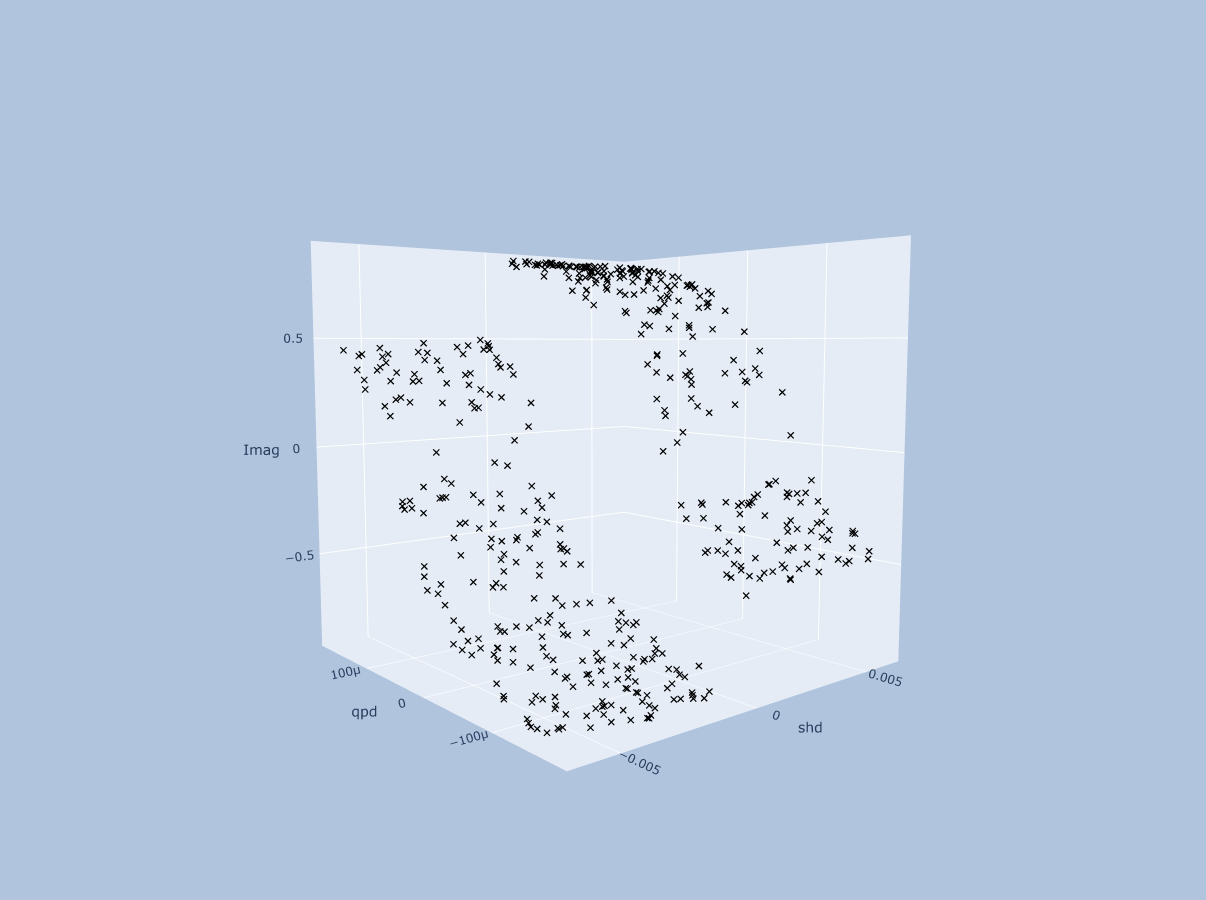

In [6]:
plot_i = 2
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=df["Imag"][::plot_i], name="Data", mode="markers", marker=dict(size=2, symbol="x", color="black")))

fig.update_layout(
    scene=dict(xaxis_title="shd", yaxis_title="qpd", zaxis_title="Imag"),
    autosize=False, width=900, height=900,
    paper_bgcolor="LightSteelBlue",
    margin=dict(l=20, r=20, t=20, b=20),
    scene_camera=dict(eye=dict(x=-1.25, y=-1.5, z=0.2))
)

## Train-Test Split

In [7]:
train_df, test_df = train_test_split(scaled_df)
Xtrain, ytrain = train_df[["shd", "qpd"]].values, train_df["Imag"].values
Xtest, ytest = test_df[["shd", "qpd"]].values, test_df["Imag"].values

In [8]:
Xtrain.shape, ytrain.shape, "\t", Xtest.shape, ytest.shape

((750, 2), (750,), '\t', (250, 2), (250,))

## Generate the model descriptions

In [9]:
model_list =["s1s2_WC", "s1s2", "t12_WC", "t12", "tot_WC", "tot"]
m_s1s2_without_constrait =  (("s(1)", 100, "none", 0, "e"), 
                             ("s(2)", 100, "none", 0, "e"), )
m_s1s2 = (("s(1)", 100, "inc", 6000, "e"), 
          ("s(2)", 100, "inc", 6000, "e"), )

m_t12_without_constraint = (("t(1,2)", (40,10), ("none", "none"), (0,0), ("e", "e")), )
m_t12 = (("t(1,2)", (40,10), ("inc", "inc"), (6000,6000), ("e", "e")), )

m_tot_without_constraint = ( #("s(1)", 100, "none", 0, "e"), 
                             ("s(2)", 100, "none", 0, "e"),
                             ("t(1,2)", (40,10), ("none", "none"), (0,0), ("e", "e")), )
m_tot = ( #("s(1)", 100, "none", 1000, "e"), 
          ("s(2)", 100, "inc", 1000, "e"),
          ("t(1,2)", (40,10), ("inc", "inc"), (6000,6000), ("e", "e")), )

## Fit the models

In [11]:
STAREG = Stareg()

In [11]:
M1 = STAREG.fit(m_s1s2_without_constrait, Xtrain, ytrain)
M2 = STAREG.fit(m_s1s2, Xtrain, ytrain)

In [14]:
M3 = STAREG.fit(m_t12_without_constraint, Xtrain, ytrain)
M4 = STAREG.fit(m_t12, Xtrain, ytrain)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.06it/s]


===================Iteration 1====================
            MSE: 0.0011461879758966225            


  2%|███▎                                                                                                                                                                 | 2/100 [00:00<00:06, 14.02it/s]

---------------Iteration Finished!----------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.20it/s]


===================Iteration 1====================
            MSE: 0.0022169159429075336            
===================Iteration 2====================
            MSE: 0.0022651299796446174            
===================Iteration 3====================
            MSE: 0.0023872531552730732            
===================Iteration 4====================
             MSE: 0.00240907335268464             
===================Iteration 5====================
            MSE: 0.0024899558034628504            
===================Iteration 6====================
            MSE: 0.0024749292424831055            
===================Iteration 7====================
            MSE: 0.003139147295893039             
===================Iteration 8====================
            MSE: 0.002775554272129595             
===================Iteration 9====================
            MSE: 0.0023911085176114653            
===================Iteration 10===================
            MSE: 0.002431475711

In [15]:
M5 = STAREG.fit(m_tot_without_constraint, Xtrain, ytrain)
M6 = STAREG.fit(m_tot, Xtrain, ytrain)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.96it/s]


===================Iteration 1====================
            MSE: 0.0010112666499657288            


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [00:00<00:00, 209.43it/s]

---------------Iteration Finished!----------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.16it/s]


===================Iteration 1====================
            MSE: 0.0019325638071663396            
===================Iteration 2====================
            MSE: 0.0020371368211718486            
===================Iteration 3====================
            MSE: 0.002875856945136214             
===================Iteration 4====================
            MSE: 0.0021710856991905446            
===================Iteration 5====================
            MSE: 0.002204490304338568             
===================Iteration 6====================
             MSE: 0.00261106390859459             
===================Iteration 7====================
            MSE: 0.0022048617266535817            
===================Iteration 8====================
            MSE: 0.002253333487579839             
===================Iteration 9====================
            MSE: 0.0022627073353881466            
===================Iteration 10===================
            MSE: 0.002283592957

## Calculate Predictions on Test Data

In [16]:
M1pred = STAREG.predict(Xpred=Xtest, model=M1["model"], coef_=M1["coef_"])
M2pred = STAREG.predict(Xpred=Xtest, model=M2["model"], coef_=M2["coef_"])
M3pred = STAREG.predict(Xpred=Xtest, model=M3["model"], coef_=M3["coef_"])
M4pred = STAREG.predict(Xpred=Xtest, model=M4["model"], coef_=M4["coef_"])
M5pred = STAREG.predict(Xpred=Xtest, model=M5["model"], coef_=M5["coef_"])
M6pred = STAREG.predict(Xpred=Xtest, model=M6["model"], coef_=M6["coef_"])

Process  s(1)
Process  s(2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  t(1,2)
Process  s(2)
Process  t(1,2)
Process  s(2)
Process  t(1,2)


## MSE and EDoF on Test Data

In [17]:
MSE_M1, edof_M1 = mean_squared_error(ytest, M1pred["ypred"]), STAREG.calc_edof(B=M1["B"], S=M1["S"], K=M1["K"]).round(3)
MSE_M2, edof_M2 = mean_squared_error(ytest, M2pred["ypred"]), STAREG.calc_edof(B=M2["B"], S=M2["S"], K=M2["K"]).round(3)

MSE_M3, edof_M3 = mean_squared_error(ytest, M3pred["ypred"]), STAREG.calc_edof(B=M3["B"], S=M3["S"], K=M3["K"]).round(3)
MSE_M4, edof_M4 = mean_squared_error(ytest, M4pred["ypred"]), STAREG.calc_edof(B=M4["B"], S=M4["S"], K=M4["K"]).round(3)
MSE_M5, edof_M5 = mean_squared_error(ytest, M5pred["ypred"]), STAREG.calc_edof(B=M5["B"], S=M5["S"], K=M5["K"]).round(3)
MSE_M6, edof_M6 = mean_squared_error(ytest, M6pred["ypred"]), STAREG.calc_edof(B=M6["B"], S=M6["S"], K=M6["K"]).round(3)

r, lj = 8, 14
print("".center(50,"="))
print("MSEs on Validation Data".center(50, " "))
print("".center(50,"="))
print(f"{model_list[0]}-MSE = ".ljust(lj), MSE_M1, " EDoF: ".rjust(r, "|"), edof_M1)
print(f"{model_list[1]}-MSE = ".ljust(lj), MSE_M2, " EDoF: ".rjust(r, "|"), edof_M2)
print(f"{model_list[2]}-MSE = ".ljust(lj), MSE_M3, " EDoF: ".rjust(r, "|"), edof_M3)
print(f"{model_list[3]}-MSE = ".ljust(lj), MSE_M4, " EDoF: ".rjust(r, "|"), edof_M4)
print(f"{model_list[4]}-MSE = ".ljust(lj), MSE_M5, " EDoF: ".rjust(r, "|"), edof_M5)
print(f"{model_list[5]}-MSE = ".ljust(lj), MSE_M6, " EDoF: ".rjust(r, "|"), edof_M6)

df_mses = pd.DataFrame(
    data=dict(Model=["M1","M2","M3","M4","M5","M6"], MSE_val=[MSE_M1, MSE_M2, MSE_M3, MSE_M4, MSE_M5, MSE_M6], 
              EDoF=[edof_M1, edof_M2, edof_M3, edof_M4, edof_M5, edof_M6]))

             MSEs on Validation Data              
s1s2_WC-MSE =  0.03454786210411458 | EDoF:  20.488
s1s2-MSE =     0.03460287509633609 | EDoF:  15.477
t12_WC-MSE =   0.005827893823624244 | EDoF:  262.332
t12-MSE =      0.005079149825823735 | EDoF:  57.22
tot_WC-MSE =   0.0057031655280407045 | EDoF:  265.207
tot-MSE =      0.0047235490170244995 | EDoF:  53.598


## Plot model 4 and model 6

Process  s(1)
Process  s(2)
Process  s(1)
Process  s(2)


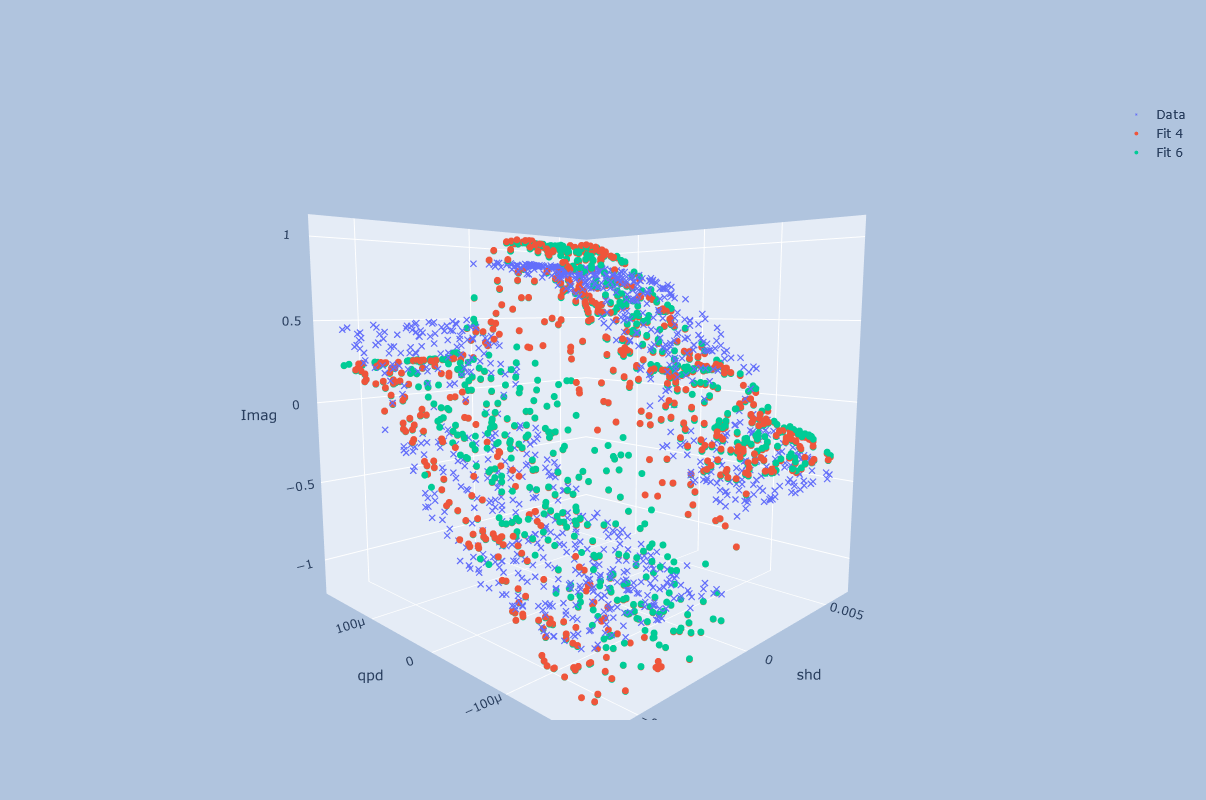

In [20]:
M4__ = STAREG.predict(Xpred=scaled_df[inputs].values, model=M1["model"], coef_=M1["coef_"])
M6__ = STAREG.predict(Xpred=scaled_df[inputs].values, model=M2["model"], coef_=M2["coef_"])


plot_i = 1
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=df["Imag"][::plot_i], name="Data", mode="markers", marker=dict(size=2, symbol="x")))
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=M4__["ypred"][::plot_i], name="Fit 4", mode="markers",marker=dict(size=4, symbol="circle")))
fig.add_trace(go.Scatter3d(x=df["shd"][::plot_i], y=df["qpd"][::plot_i], z=M6__["ypred"][::plot_i], name="Fit 6", mode="markers",marker=dict(size=4, symbol="circle")))

fig.update_layout(
    scene=dict(xaxis_title="shd", yaxis_title="qpd", zaxis_title="Imag"),
    autosize=False, height=800, width=900,
    showlegend=True, paper_bgcolor="LightSteelBlue",
    #margin=dict(l=200, r=20, t=20, b=20),
    scene_camera=dict(eye=dict(x=-1.25, y=-1.5, z=0.2))
)

## Save Data and Fits

In [29]:
M1_save = STAREG.predict(Xpred=scaled_df[inputs].values, model=M1["model"], coef_=M1["coef_"])
M2_save = STAREG.predict(Xpred=scaled_df[inputs].values, model=M2["model"], coef_=M2["coef_"])
M3_save = STAREG.predict(Xpred=scaled_df[inputs].values, model=M3["model"], coef_=M3["coef_"])
M4_save = STAREG.predict(Xpred=scaled_df[inputs].values, model=M4["model"], coef_=M4["coef_"])
M5_save = STAREG.predict(Xpred=scaled_df[inputs].values, model=M5["model"], coef_=M5["coef_"])
M6_save = STAREG.predict(Xpred=scaled_df[inputs].values, model=M6["model"], coef_=M6["coef_"])


Process  s(1)
Process  s(2)
Process  s(1)
Process  s(2)
Process  t(1,2)
Process  t(1,2)
Process  s(2)
Process  t(1,2)
Process  s(2)
Process  t(1,2)


In [33]:
df_save_fits = pd.DataFrame(
    data=dict(x1=df["shd"].values, x2=df["qpd"].values, M1=M1_save["ypred"],
              M2=M2_save["ypred"],M3=M3_save["ypred"],M4=M4_save["ypred"],
              M5=M5_save["ypred"],M6=M6_save["ypred"]))

df_save_data = pd.DataFrame(
    data=dict(x1=df["shd"].values, x2=df["qpd"].values, y=df["Imag"].values))
        
df_info = pd.DataFrame(
    data=dict(model=model_list, nr_splines=[(100,100), (100,100), ((40,10),), ((40,10),), (100,100,(40,10),), (100,100, (40,10),)], 
              opt_lambda=[
                  [M1["model"]["f1"]["best_lambda"], M1["model"]["f2"]["best_lambda"]], 
                  [M2["model"]["f1"]["best_lambda"], M2["model"]["f2"]["best_lambda"]], 
                  [M3["model"]["f1"]["best_lambda"]], 
                  [M4["model"]["f1"]["best_lambda"]], 
                  [M5["model"]["f1"]["best_lambda"], M5["model"]["f2"]["best_lambda"]], 
                  [M6["model"]["f1"]["best_lambda"], M6["model"]["f2"]["best_lambda"]]],
             constraint=[
                 ["none"],
                 ["none", "inc"],
                 ["none, none"],
                 ["none, inc"],
                 ["none", "none,none"],
                 ["inc", "inc,inc"]]))
                  

In [34]:
df_save_data.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,-0.000033,-0.000002,-0.007191
std,0.003631,0.000105,0.632910
min,-0.006300,-0.000180,-0.884992
25%,-0.003150,-0.000096,-0.606224
50%,-0.000051,-0.000002,-0.150727
75%,0.002967,0.000090,0.642785
max,0.006300,0.000180,0.883220


In [36]:
df_save_data.shape

(1000, 3)

In [35]:
saveFiles = input("Save Files?")
if saveFiles == "y":
    print("Save files to ", savePath)
    df_save_data.to_csv(savePath+"data.txt", sep=" ", index=0)
    df_save_fits.to_csv(savePath+"fits.txt", sep=" ", index=0)
    df_mses.to_csv(savePath+"mses.csv", sep=",", index=0)
    df_info.to_csv(savePath+"info.txt", sep=" ", index=0)
else:
    print("Don't save files.")

Save Files? y


Save files to  ../../Thesis/tex/graphics/data/chaBosch/


In [75]:
Xtrain = np.linspace(0,5,100)

y = Xtrain**2 + np.random.normal(scale=0.1, size=100)


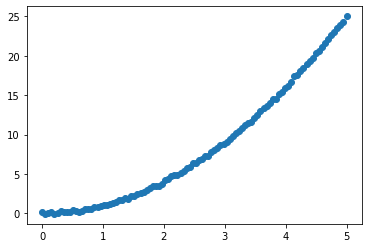

In [76]:
plt.scatter(Xtrain, y)

In [80]:
m =  (("s(1)", 100, "dec", 0, "e"), ) 
m2 =  (("s(1)", 100, "dec", 100, "e"), ) 
m3 =  (("s(1)", 100, "dec", 10000, "e"), ) 
m4 =  (("s(1)", 100, "dec", 1e18, "e"), ) 


In [78]:
M1 = STAREG.fit(m, Xtrain.reshape(-1,1), y)
M2 = STAREG.fit(m2, Xtrain.reshape(-1,1), y)
M3 = STAREG.fit(m3, Xtrain.reshape(-1,1), y)

In [81]:
M4 = STAREG.fit(m4, Xtrain.reshape(-1,1), y)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.28it/s]


===================Iteration 1====================
             MSE: 126.84000501445918              
---------------Iteration Finished!----------------


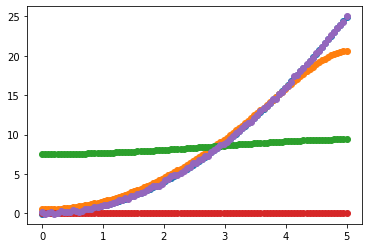

In [82]:
plt.scatter(Xtrain, M1["B"]@M1["coef_"])
plt.scatter(Xtrain, M2["B"]@M2["coef_"])
plt.scatter(Xtrain, M3["B"]@M3["coef_"])
plt.scatter(Xtrain, M4["B"]@M4["coef_"])
plt.scatter(Xtrain, y)